# Projeto offline de aprendizado de máquina ponta a ponta : Boston Housings
---

Nesse notebook irá ser implementado um projeto completo de aprendizado de máquina no conjunto de dados Boston Housing.

# Configuração inicial
---
 As bibliotecas que serão utilizadas são:


1.   Scikit-learn
2.   Pandas
4.   Seaborn
5.   Matplotlib
6.   Numpy


In [1]:
from sklearn.datasets import load_boston 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,20)})
plt.style.use('seaborn')


In [2]:
# estabelecendo uma seed padrão para os nossos dados, facilitando a reprodução de experimentos
seed = 19
np.random.seed(seed)

# Obtendo os dados
---
O Scikit-learn já fornece o conjunto de dados para realizar a manipulação.

In [3]:
data = load_boston()

Abaixo é fornecido uma explicação clara sobre o conjunto de dados do Boston house. Nele há informações sobre quantas instancias são dadas, número de atributos, explicações sobre cada atributo, etc. Observe abaixo a tradução das informações dos atributos:


- CRIM: Taxa de crime per capita por cidade

- ZN: proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.

- INDUS: proporção de acres de negócios não varejistas por cidade

- CHAS: Variável dummy de Charles River (= 1 se a área limita o rio; 0 caso contrário)

- NOX: concentração de óxidos nítricos (partes por 10 milhões)

- RM: número médio de quartos por habitação

- AGE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940

- DIS: distâncias ponderadas até cinco centros de empregos de Boston

- RAD: índice de acessibilidade a rodovias radiais

- TAX: taxa de imposto sobre a propriedade de valor total por $10.000 

- PTRATIO: proporção aluno-professor por cidade

- B: 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade

- LSTAT: % status inferior da população

- MEDV : Valor médio das casas ocupadas pelo proprietário em US $ 1.000


In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Para realizar as manipulações, estou colocando os dados em um dataframe do pandas. 

In [5]:
#criando um dataframe para realizar a manipulação dos dados

df = pd.DataFrame(data = data['data'], columns = data['feature_names'])
df['MEDV'] = data['target']  #o scikit learn deixa separado o target das features 


Algumas informações sobre o dataset. Observamos que só há valores do tipo ponto flutuante.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Abaixo está alguns dados estatísticos do dataset. Observe que algumas colunas estão com um desvio padrão alto, além de que a média e a mediana estão com valores bem discrepantes comparando-as, podendo indicar presença de valores anômalos nos dados. Futuramente confirmaremos se essa hipótese está correta.

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Retirando 15 amostras aléatorias, não observo dados faltantes.

O atributo CHAS parecia ser categórico, mas foi transformado.

In [8]:
df.sample(15, random_state= seed)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
38,0.17505,0.0,5.96,0.0,0.4990,5.966,30.2,3.8473,5.0,279.0,19.2,393.43,10.13,24.7
10,0.22489,12.5,7.87,0.0,0.5240,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
142,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4
235,0.33045,0.0,6.20,0.0,0.5070,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88,24.0
350,0.06211,40.0,1.25,0.0,0.4290,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
396,5.87205,0.0,18.10,0.0,0.6930,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37,12.5
59,0.10328,25.0,5.13,0.0,0.4530,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
222,0.62356,0.0,6.20,1.0,0.5070,6.879,77.7,3.2721,8.0,307.0,17.4,390.39,9.93,27.5
331,0.05023,35.0,6.06,0.0,0.4379,5.706,28.4,6.6407,1.0,304.0,16.9,394.02,12.43,17.1
138,0.24980,0.0,21.89,0.0,0.6240,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32,13.3


In [9]:
print('Valores únicos da coluna CHAS:',df['CHAS'].unique())

Valores únicos da coluna CHAS: [0. 1.]


# Divisão dos dados

---

Para poder realizar uma análise exploratória, treinamento e classificação de modo que impeça que enviesemos nossos dados, é preciso dividir os dados em treino e teste. Geralmente utilizamos 70% dos dados para treino e 30% para teste, todavia esse processo de divisão acaba por se tornar prejudicial para dados desbalanceados. Por isso utilizarei a técnica de estratificação dos dados de 10 em 10 mil dólares.

In [10]:
df['MEDV_cat'] = pd.cut(df['MEDV'],bins=[0., 10., 20.0, 30.0, 40., 50.])

df['MEDV_cat'].value_counts().sort_index()

(0.0, 10.0]      24
(10.0, 20.0]    191
(20.0, 30.0]    207
(30.0, 40.0]     53
(40.0, 50.0]     31
Name: MEDV_cat, dtype: int64

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = seed)

for train_index, test_index in split.split(df,df['MEDV_cat']):
  s_train = df.loc[train_index]
  s_test = df.loc[test_index]



In [12]:
s_train = s_train.drop(['MEDV_cat'],axis = 1)
s_test = s_test.drop(['MEDV_cat'],axis = 1)

Acima estou excluindo o atributo categórico, pois não há mais serventia para ele.

# Análise Exploratória dos dados


---



In [13]:
amostra = s_train.copy()    #criando uma cópia do conjunto de treino para realizar a visualização

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'CRIM'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'RM'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'ZN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

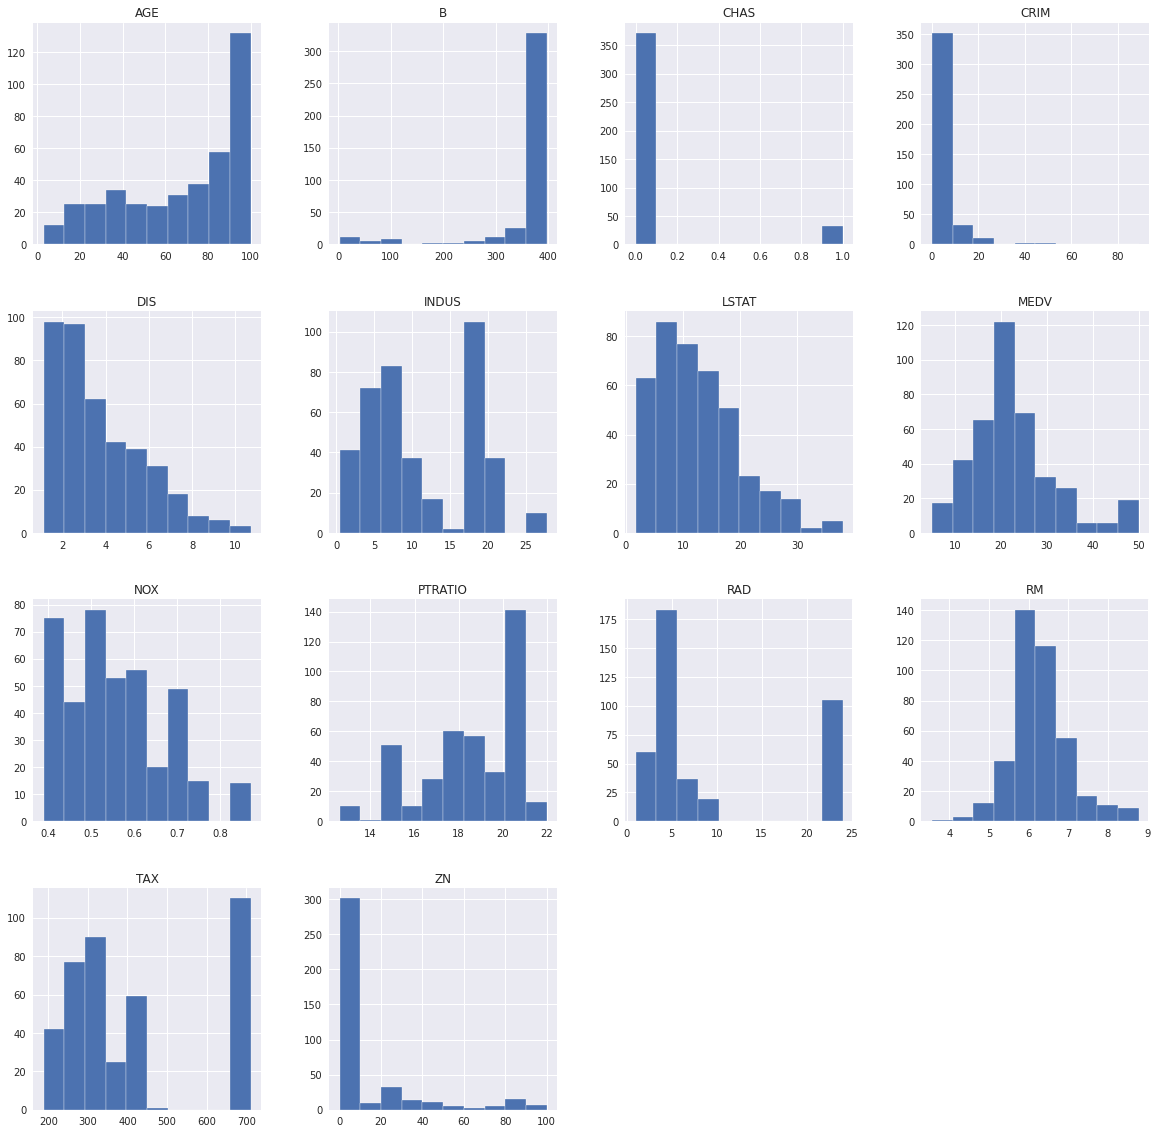

In [14]:
amostra.hist(figsize=(20,20))

A maioria das colunas acima tem comportamento de uma distribuição assimétrica positiva.

<AxesSubplot:>

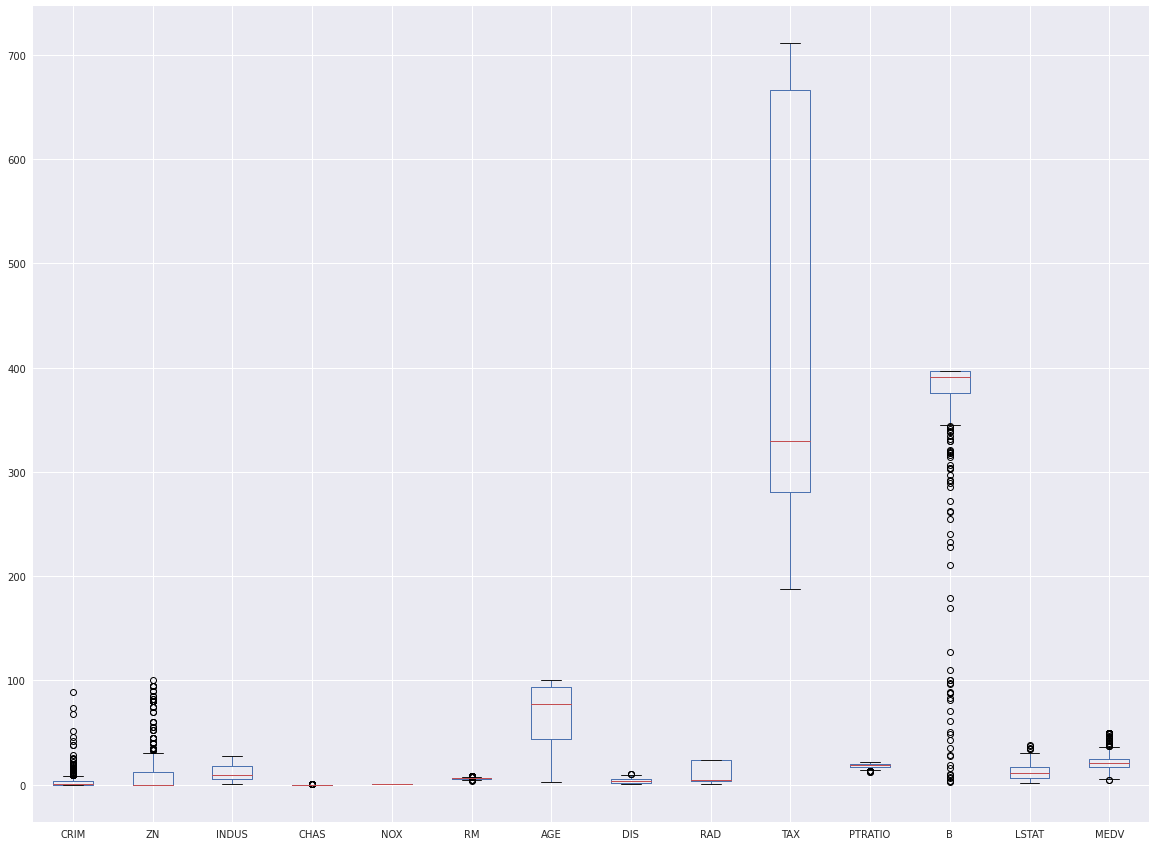

In [15]:
amostra.boxplot(figsize=(20,15))

Como previsto, algumas colunas possuem outliers em seus dados. Existe algumas abordagem para tratar os dados anômalos, desde substitui-los pelo método de imputação ou simplismente exclui-los. Ainda não farei nada com eles no momento.

<AxesSubplot:>

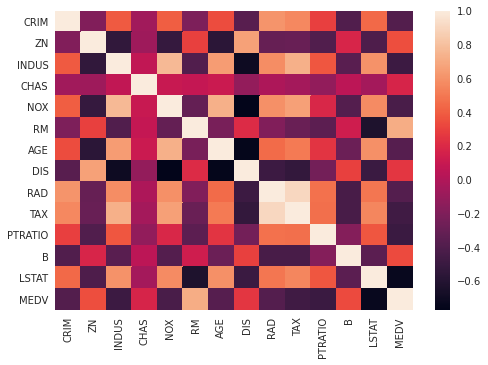

In [16]:
corr_matrix = amostra.corr()

sns.heatmap(corr_matrix)

A princípio podemos ver certas correlações fortes em algumas colunas.

In [17]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.712476
ZN         0.347595
B          0.332730
DIS        0.255594
CHAS       0.170751
AGE       -0.371587
RAD       -0.376910
CRIM      -0.386169
NOX       -0.431044
TAX       -0.471970
INDUS     -0.486608
PTRATIO   -0.498659
LSTAT     -0.733418
Name: MEDV, dtype: float64

Em relação a nossa coluna alvo acima, observamos fortes correlações proporcionais com as colunas : RM,ZN. Há também correlações inversas como por exemplo as colunas : LSTAT,PTRATIO,INDUS,TAX,NOX e CRIM. 

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

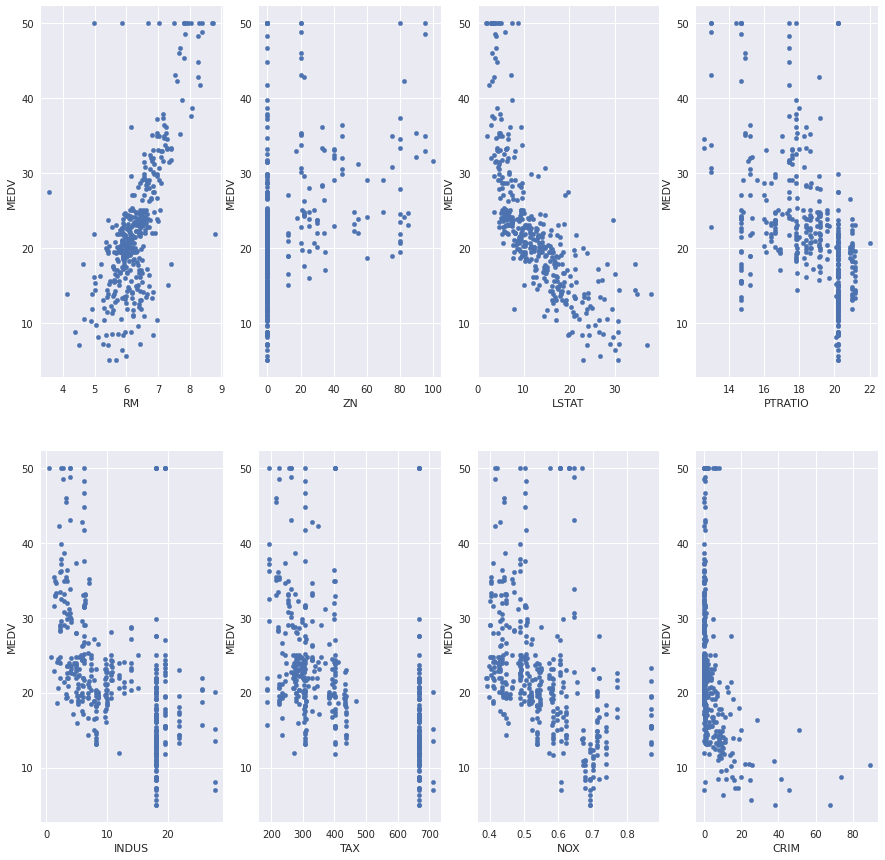

In [18]:
from pandas.plotting import scatter_matrix

fig, axes = plt.subplots(nrows=2, ncols=4)

size = (15,15)

amostra.plot(kind = 'scatter', x = 'RM', y = 'MEDV', figsize = size,ax = axes[0,0])
amostra.plot(kind = 'scatter', x = 'ZN', y = 'MEDV',figsize = size,ax = axes[0,1])
amostra.plot(kind = 'scatter', x ='LSTAT',y = 'MEDV', figsize=size,ax = axes[0,2])
amostra.plot(kind = 'scatter', x ='PTRATIO',y = 'MEDV', figsize=size,ax = axes[0,3])
amostra.plot(kind = 'scatter', x ='INDUS',y = 'MEDV', figsize=size,ax = axes[1,0])
amostra.plot(kind = 'scatter', x ='TAX',y = 'MEDV', figsize=size,ax = axes[1,1])
amostra.plot(kind = 'scatter', x ='NOX',y = 'MEDV', figsize=size,ax = axes[1,2])
amostra.plot(kind = 'scatter', x ='CRIM',y = 'MEDV', figsize=size,ax = axes[1,3])

# Preparação para os algoritmos de Aprendizado de Máquina

---

In [19]:
amostra_x = amostra.drop(['MEDV'], axis=1) #retirando a colunas alvo 
y = amostra['MEDV']

In [20]:
amostra_x.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Não há valores ausentes no conjunto de dados amostral, porém nada se sabe sobre o conjunto de teste. Por isso vou utilizar o método de imputação pela mediana.

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [22]:
imputer.fit(amostra_x)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_     #mediana de todas as colunas

array([2.6266e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.3800e-01,
       6.1975e+00, 7.7150e+01, 3.1222e+00, 5.0000e+00, 3.3000e+02,
       1.9000e+01, 3.9144e+02, 1.1200e+01])

In [24]:
amostra_x.median().values #conferindo se a mediana está igual a dos dados

array([2.6266e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.3800e-01,
       6.1975e+00, 7.7150e+01, 3.1222e+00, 5.0000e+00, 3.3000e+02,
       1.9000e+01, 3.9144e+02, 1.1200e+01])

In [25]:
X = imputer.transform(amostra_x)

X = pd.DataFrame( data = X, columns= amostra_x.columns, index = amostra_x.index) #colocando em um dataframe


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
     ('imputer', SimpleImputer(strategy="median")),
     ('std_scaler', StandardScaler())
])


x_tr = pipe.fit_transform(X)


# Treinamento e seleção de um modelo

---

In [27]:
def plot_learn_curve(train_sizes, train_scores, test_scores,name):
    train_mean = -np.mean(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label = 'Training error')
    plt.plot(train_sizes, test_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(name, fontsize = 18, y = 1.03)
    plt.legend()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict,learning_curve
from sklearn.metrics import mean_squared_error,mean_absolute_error

pred = cross_val_predict(LinearRegression(),x_tr,y, cv = 10)

print('MSE:',mean_squared_error(y,pred))
print('MAE:',mean_absolute_error(y,pred))

MSE: 24.579043156494528
MAE: 3.43475075397124


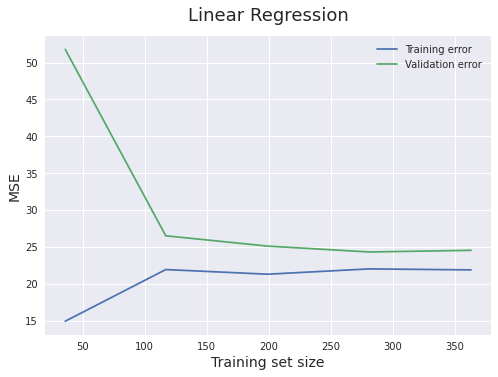

In [29]:
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(),x_tr,y,cv=10,scoring = 'neg_mean_squared_error',shuffle=True)


plot_learn_curve(train_sizes, train_scores, test_scores,name = 'Linear Regression')

In [30]:
from sklearn.ensemble import RandomForestRegressor

pred = cross_val_predict(RandomForestRegressor(),x_tr,y, cv = 10)

print('MSE:',mean_squared_error(y,pred))
print('MAE:',mean_absolute_error(y,pred))

MSE: 12.887496254950495
MAE: 2.3572301980198014


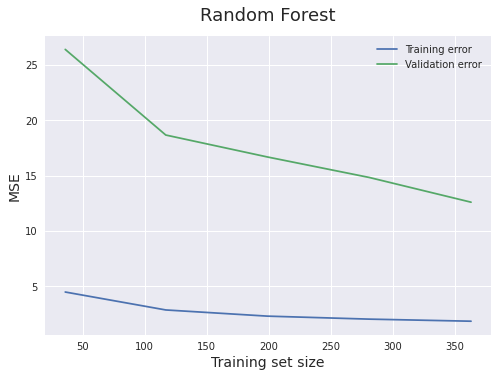

In [31]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(),x_tr,y,cv=10,shuffle=True,scoring = 'neg_mean_squared_error')


plot_learn_curve(train_sizes, train_scores, test_scores,name = 'Random Forest')

In [32]:
from sklearn.neighbors import KNeighborsRegressor

pred = cross_val_predict(KNeighborsRegressor(),x_tr,y, cv = 10)

print('MSE:',mean_squared_error(y,pred))
print('MAE:',mean_absolute_error(y,pred))

MSE: 25.05224257425743
MAE: 3.095396039603961


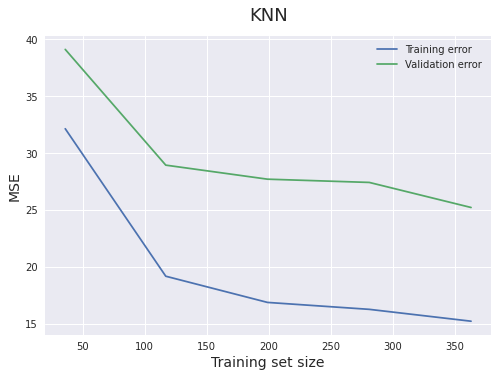

In [33]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsRegressor(),x_tr,y,shuffle=True,cv=10,scoring = 'neg_mean_squared_error')


plot_learn_curve(train_sizes, train_scores, test_scores,name = 'KNN')

In [34]:
from sklearn.tree import DecisionTreeRegressor

pred = cross_val_predict(DecisionTreeRegressor(),x_tr,y, cv = 10)

print('MSE:',mean_squared_error(y,pred))
print('MAE:',mean_absolute_error(y,pred))

MSE: 24.77267326732673
MAE: 3.1094059405940597


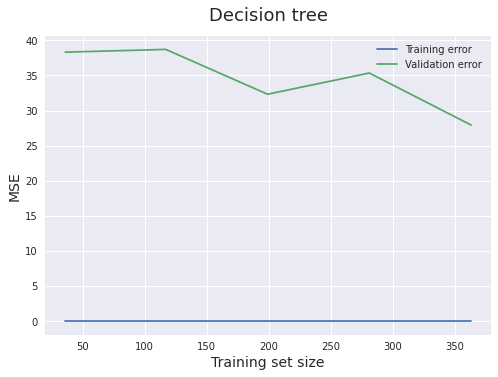

In [35]:
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeRegressor(),x_tr,y,cv=10,shuffle=True,scoring = 'neg_mean_squared_error')


plot_learn_curve(train_sizes, train_scores, test_scores,name = 'Decision tree')

In [36]:
from sklearn.svm import SVR

pred = cross_val_predict(SVR(),x_tr,y,cv =10)

print('MSE:',mean_squared_error(y,pred))
print('MAE:',mean_absolute_error(y,pred))

MSE: 31.395029396765313
MAE: 3.261943267722988


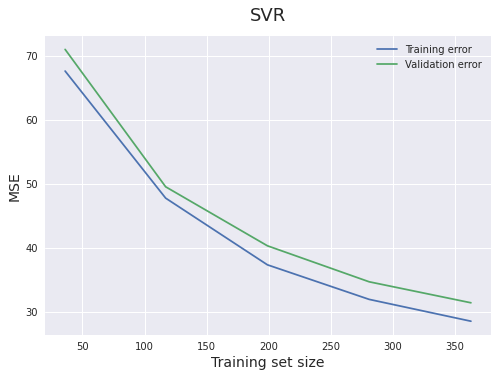

In [37]:
train_sizes, train_scores, test_scores = learning_curve(SVR(),x_tr,y,shuffle=True,cv=10,scoring = 'neg_mean_squared_error')


plot_learn_curve(train_sizes, train_scores, test_scores,name = 'SVR')

Observando as curvas de aprendizado, podemos afirmar que:

- A regressão linear possui uma baixa variancia, ou seja o overfitting é muito baixo;

- O random forest possui um gap muito grande, isso significa que sua variancia é alta(alto overfitting). Mas ao que parece ser se continuarmos a aumenta a quantidade de dados, ele continuaria a diminuir. Outra medida é mexer nas seus hiperparametros(grid search).

- O KNN também possui um problema de overfitting, que parece diminuir se colocar mais instancias;

- A decision tree possui um overfitting extremamente alto;

- O SVR parece tem uma baixa variancia e conforme a quantidade de dados aumenta seu erro diminui.


Dado essas afirmações o random forest será escolhido para o processo de ajuste de hiperparametros e estimação do erro de generalização.


# Ajuste do modelo de aprendizado de máquina

---

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8],'max_depth' : [4,5,6,7,8],},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4],'max_depth' : [4,5,6,7,8],}
  ]

clf = RandomForestRegressor(random_state=seed)

grid_search = GridSearchCV(clf,param_grid=param_grid,scoring='neg_mean_squared_error',
                            return_train_score=True)


grid_search.fit(x_tr,y)

GridSearchCV(estimator=RandomForestRegressor(random_state=19),
             param_grid=[{'max_depth': [4, 5, 6, 7, 8],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_depth': [4, 5, 6, 7, 8],
                          'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
grid_search.best_params_

{'max_depth': 7, 'max_features': 8, 'n_estimators': 30}

In [40]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=7, max_features=8, n_estimators=30,
                      random_state=19)

# Teste final do modelo de Aprendizado de máquina

--- 

In [41]:
modelo_final = grid_search.best_estimator_

x_test = s_test.drop(['MEDV'],axis = 1)
y_test = s_test['MEDV'].copy()

x_test_tr = pipe.fit_transform(x_test)

final_pred = modelo_final.predict(x_test_tr)

print('MSE:',mean_squared_error(y_test,final_pred))
print('MAE:',mean_absolute_error(y_test,final_pred))


MSE: 11.402747807869758
MAE: 2.3792151334177207


O modelo está com um erro bem próximo de zero, isso indica que ele está apto a realizar o deploy.